## Unveiling the Android App Market: Google Play Store Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
apps = pd.read_csv("apps_googleplay.csv")
reviews = pd.read_csv("user_reviewsapp.csv")

In [3]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
apps.shape

(9659, 14)

In [6]:
reviews.shape

(64295, 5)

In [7]:
apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [8]:
reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [9]:
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
len(apps[apps.duplicated()])

0

In [11]:
reviews.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [12]:
len(reviews[reviews.duplicated()])

33616

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [14]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


#### Removed unnecessary column

In [15]:
apps.drop("Unnamed: 0", axis=1, inplace=True)

In [16]:
reviews.drop_duplicates(inplace=True)

- Reviews dataset had many duplicate rows.
- Removed duplicates to ensure accurate sentiment analysis.

In [17]:
apps['Installs']= apps['Installs'].str.replace('+','')
apps['Installs']=apps['Installs'].str.replace(',','')

In [18]:
apps['Installs']=apps['Installs'].astype(int)

- Converted install column from object to integer for numerical analysis.

In [20]:
apps['Price']= apps['Price'].str.replace('$','')
apps['Price']=apps['Price'].astype(float)

- Converted price column to float for analysis of paid apps.

In [21]:
apps.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

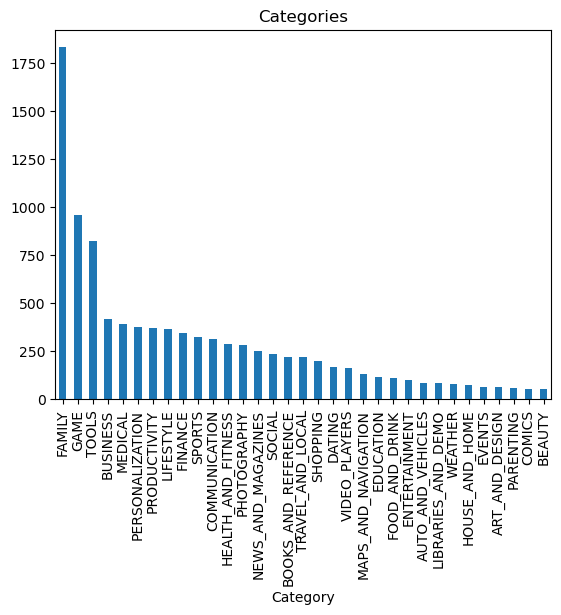

In [26]:
apps['Category'].value_counts().plot(kind='bar')
plt.title("Categories")
plt.show()

- Most apps belong to FAMILY category.
- Some categories have low market share.

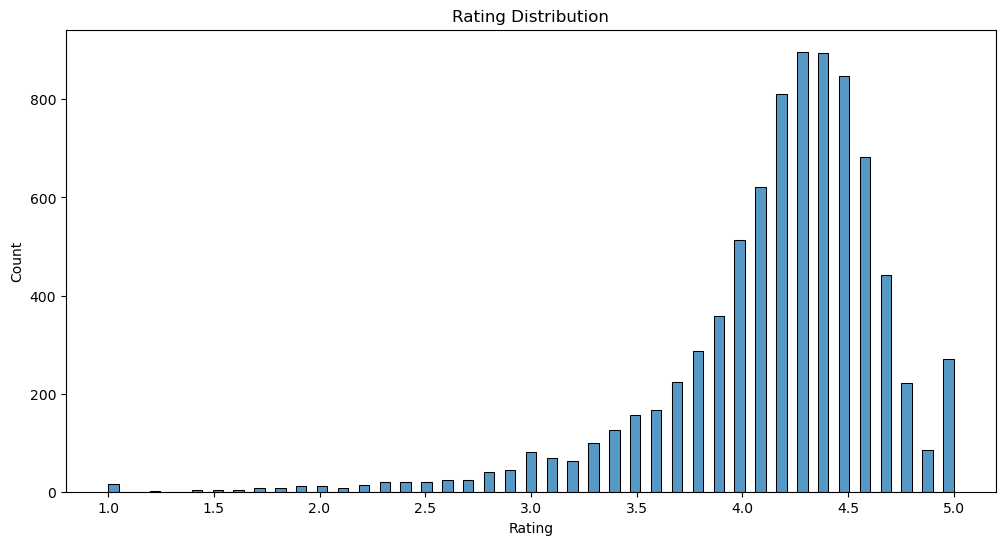

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(x=apps["Rating"])
plt.title("Rating Distribution")
plt.show()

- Most apps have ratings between 4.0 and 4.5.
- Very few apps have ratings below 3.

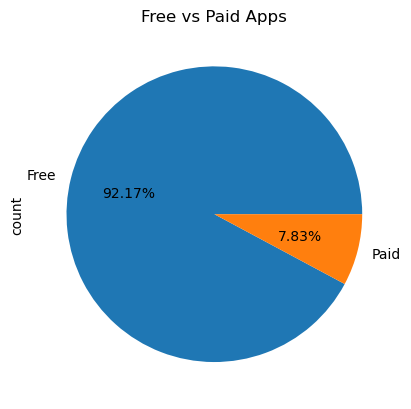

In [34]:
apps['Type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Free vs Paid Apps")
plt.show()

- Majority apps are free.
- Paid apps are very limited.

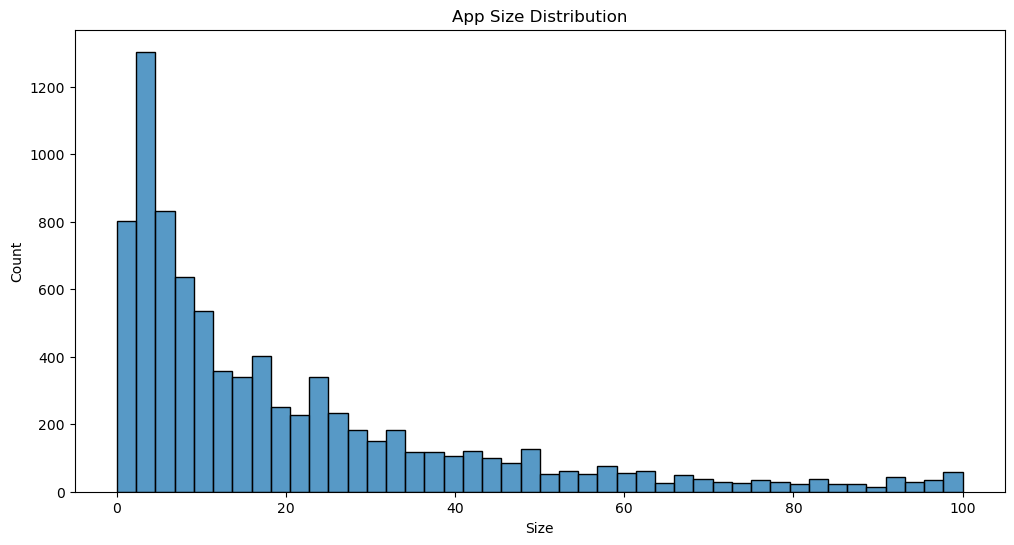

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(x=apps["Size"])
plt.title("App Size Distribution")
plt.show()

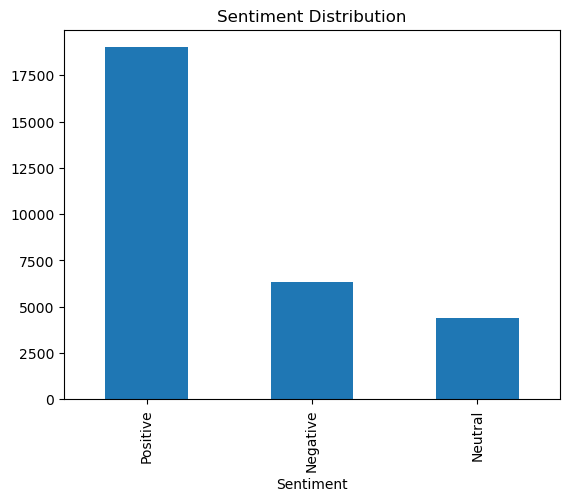

In [36]:
reviews['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()

- Positive reviews dominate.
- Negative reviews are comparatively less.

In [37]:
merged = pd.merge(apps,reviews, on="App")

In [38]:
merged.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending = False)

Category
COMICS                 0.440031
EVENTS                 0.375086
AUTO_AND_VEHICLES      0.343119
PARENTING              0.313316
EDUCATION              0.297454
HEALTH_AND_FITNESS     0.294214
WEATHER                0.281344
FOOD_AND_DRINK         0.279847
PERSONALIZATION        0.274455
MAPS_AND_NAVIGATION    0.259767
BOOKS_AND_REFERENCE    0.258982
LIBRARIES_AND_DEMO     0.239990
ART_AND_DESIGN         0.233363
MEDICAL                0.226539
HOUSE_AND_HOME         0.224876
LIFESTYLE              0.224727
PHOTOGRAPHY            0.224586
TOOLS                  0.213829
TRAVEL_AND_LOCAL       0.212001
SHOPPING               0.202272
BEAUTY                 0.199734
BUSINESS               0.199730
SPORTS                 0.195027
PRODUCTIVITY           0.194531
DATING                 0.179436
FINANCE                0.171977
COMMUNICATION          0.171862
NEWS_AND_MAGAZINES     0.152946
VIDEO_PLAYERS          0.136103
ENTERTAINMENT          0.133953
FAMILY                 0.119083

- Categories with higher sentiment polarity have better user satisfaction.
- Positive sentiment often matches higher ratings.

In [40]:
merged[['Rating','Sentiment_Polarity']].corr()

,Rating,Sentiment_Polarity
Rating,1.000000,0.111586
Sentiment_Polarity,0.111586,1.000000


- Apps with higher ratings henerally show positive sentiment polarity.

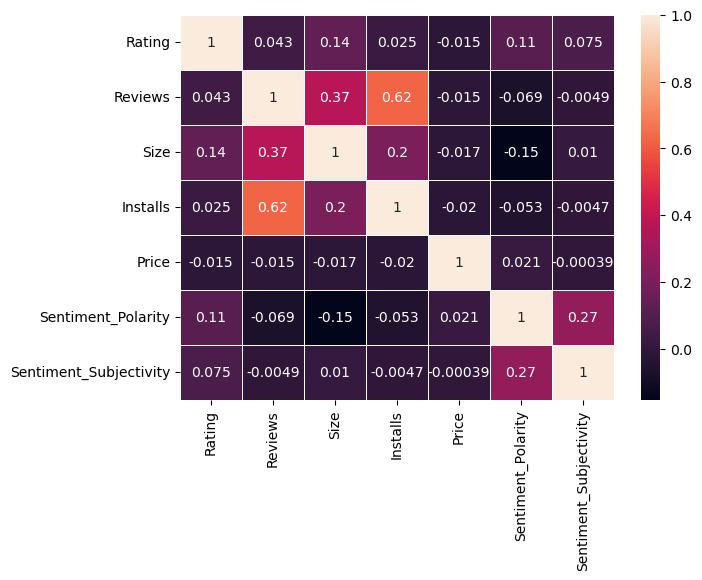

In [46]:
plt.figure(figsize=(7,5))
sns.heatmap(merged.corr(numeric_only=True), annot=True, linewidths=0.5)
plt.show()